# Industry Assignment - 2

## 1 - Data Collection - Completeness and correctness of data collection

In [142]:
# Importing all the necessary libraries and installing package

# !pip3 install statsmodels 
import os
import warnings
import pandas as pd # Importing pandas for working with daframes
import numpy as np # numpy for numeric computation
import matplotlib.pyplot as plt # Matplotlib for ploting
from sklearn.preprocessing import LabelEncoder # label encoding for categorical data.
# Checking For Stationarity using Argumented Dickey Fuller test
from statsmodels.tsa.stattools import adfuller # Getting the value of d (Integrated)
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Getting q, p
from statsmodels.tsa.arima.model import ARIMA # Importing ARIMA model from statsmodels
from sklearn.metrics import mean_squared_error, mean_absolute_error # Error Metrics 
from math import sqrt
from sklearn.preprocessing import MinMaxScaler # pre-processing min-max scalling
from sklearn.model_selection import train_test_split # Splitling in train and test set
from sklearn.linear_model import LogisticRegression # Importing logistic regression model
from sklearn.metrics import accuracy_score # Evaualating accuracy of logistic regression model

In [143]:
# Getting the current working directory.

os.getcwd()

'/home/user780/user780/AI_Assignment_2'

In [144]:
warnings.filterwarnings('ignore')

In [145]:
# For prediction of the whether the it will rain the next day 2017-06-25 or not.
# I have used ARIMA model for predicting Rainfall float value for the next day 2017-06-25.
# Rainfall -> (p, d, q) --> (2,1,4)
# Also, Logistic Regression to get the boolean value below:-
# 1 :- Will rain on next day 2017-06-25
# 0 :- Will not rain on next day 2017-06-25

# Reading the csv file of "weatherAUS" and setting index column to Date and parse date to be true.
# So that pandas can parse the datavalues in date format.
df = pd.read_csv('/home/user780/user780/AI_Assignment_2/weatherAUS.csv', index_col='Date', parse_dates=True)
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
Date,,,,,,,,,,,,,,,,,,,,,
2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


## 2 - Data preparation - cleansing and preparing data for the next steps of model development

In [146]:
df.shape # checking the shape of the dataframe

(142193, 23)

In [147]:
df.dtypes # Checking the datatypes of the dataframe columns

Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RISK_MM          float64
RainTomorrow      object
dtype: object

In [148]:
df.isna().sum()

Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainToday         1406
RISK_MM              0
RainTomorrow         0
dtype: int64

In [149]:
df.info() # Information of all the dataframe columns and there datatypes.

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 142193 entries, 2008-12-01 to 2017-06-24
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       142193 non-null  object 
 1   MinTemp        141556 non-null  float64
 2   MaxTemp        141871 non-null  float64
 3   Rainfall       140787 non-null  float64
 4   Evaporation    81350 non-null   float64
 5   Sunshine       74377 non-null   float64
 6   WindGustDir    132863 non-null  object 
 7   WindGustSpeed  132923 non-null  float64
 8   WindDir9am     132180 non-null  object 
 9   WindDir3pm     138415 non-null  object 
 10  WindSpeed9am   140845 non-null  float64
 11  WindSpeed3pm   139563 non-null  float64
 12  Humidity9am    140419 non-null  float64
 13  Humidity3pm    138583 non-null  float64
 14  Pressure9am    128179 non-null  float64
 15  Pressure3pm    128212 non-null  float64
 16  Cloud9am       88536 non-null   float64
 17  Cloud3pm     

In [150]:
# For all the float datatypes in the dataframe columns filling it with mean of specific columns
# For all the object datatypes in the dataframe columns filling it with mode of specific columns

obj = df.select_dtypes(include='float').columns
for i in obj:
    df[str(i)].fillna(df[str(i)].mean(), inplace=True)

obj2 = df.select_dtypes(include='object').columns
for i in obj2:
    df[str(i)].fillna(df[str(i)].mode().max(), inplace=True)

In [151]:
df.isna().sum() # Checking if there are 0 null values for all the features space.

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RISK_MM          0
RainTomorrow     0
dtype: int64

In [152]:
# Converting the object or string values of "RainTomarrow" and "RainToday" to numeric below:-
# 1 if 'yes'
# else 0

df['RainTomorrow'] = df['RainTomorrow'].apply(lambda x : 1 if x == 'Yes' else 0)
df['RainToday'] = df['RainToday'].apply(lambda x : 1 if x == 'Yes' else 0)

In [153]:
set(df['RainTomorrow']) # Checking the unique values of the 'Rain Tomarrow'

{0, 1}

In [154]:
df.dtypes

Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday          int64
RISK_MM          float64
RainTomorrow       int64
dtype: object

In [155]:
# List of the unique values for all the object datatypes columns
for i in df.select_dtypes(include='object').columns:
    print(f"Unique values in {str(i)}: \n{df[str(i)].unique()}", end="\n\n")


Unique values in Location: 
['Albury' 'BadgerysCreek' 'Cobar' 'CoffsHarbour' 'Moree' 'Newcastle'
 'NorahHead' 'NorfolkIsland' 'Penrith' 'Richmond' 'Sydney' 'SydneyAirport'
 'WaggaWagga' 'Williamtown' 'Wollongong' 'Canberra' 'Tuggeranong'
 'MountGinini' 'Ballarat' 'Bendigo' 'Sale' 'MelbourneAirport' 'Melbourne'
 'Mildura' 'Nhil' 'Portland' 'Watsonia' 'Dartmoor' 'Brisbane' 'Cairns'
 'GoldCoast' 'Townsville' 'Adelaide' 'MountGambier' 'Nuriootpa' 'Woomera'
 'Albany' 'Witchcliffe' 'PearceRAAF' 'PerthAirport' 'Perth' 'SalmonGums'
 'Walpole' 'Hobart' 'Launceston' 'AliceSprings' 'Darwin' 'Katherine'
 'Uluru']

Unique values in WindGustDir: 
['W' 'WNW' 'WSW' 'NE' 'NNW' 'N' 'NNE' 'SW' 'ENE' 'SSE' 'S' 'NW' 'SE' 'ESE'
 'E' 'SSW']

Unique values in WindDir9am: 
['W' 'NNW' 'SE' 'ENE' 'SW' 'SSE' 'S' 'NE' 'N' 'SSW' 'WSW' 'ESE' 'E' 'NW'
 'WNW' 'NNE']

Unique values in WindDir3pm: 
['WNW' 'WSW' 'E' 'NW' 'W' 'SSE' 'ESE' 'ENE' 'NNW' 'SSW' 'SW' 'SE' 'N' 'S'
 'NNE' 'NE']



In [156]:
# Through sklean's LabelEncoding we create labels which are numeric for all categorical variables 
# The labels are created in same columns and interger starts from 0.

label_encode = LabelEncoder()
df['Location'] = label_encode.fit_transform(df['Location'])
df['WindGustDir'] = label_encode.fit_transform(df['WindGustDir'])
df['WindDir9am'] = label_encode.fit_transform(df['WindDir9am'])
df['WindDir3pm'] = label_encode.fit_transform(df['WindDir3pm'])

In [157]:
df.dtypes

Location           int64
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir        int64
WindGustSpeed    float64
WindDir9am         int64
WindDir3pm         int64
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday          int64
RISK_MM          float64
RainTomorrow       int64
dtype: object

## 3 - Algorithm Understanding - Knowledge of the algorithm used for model development

In [158]:
# What is expected :-
# Create a prediction model that will predict whether it will rain the next day or not?

# According to the problem statement above I have to predict whether the next day will rain 
# or will not rain on next day. Since the data given is timeseries data in which prediction
# to de done. I have used ARIMA (Autoregressive integrated moving average) model.

# Why ARIMA model?
# --> 
# 1) It is widely used in the demand of the forecasting the time series data.
# 2) ARIMA model predicts the future values based on past values.
# 3) ARIMA makes use of lagged moving averages to smooth time series data.
# 4) It is a univariate model.
# 5) This dataset does not have seasonality. If seasonality pattern would have been there then 
# SARIMA model would have been used.
# 6) VARMAX model is a multivariate model and more computationally intensive as the
# feature space increases.
# 7) ARIMA model is a collection of Autoregressive model and Moving Average with Integration.

# Technical detail of ARIMA model:-

# ARIMA models are generally denoted as ARIMA (p,d,q) 

# Where, 

# p is the order of autoregressive model (predict future values based on past values)
# d is the degree of differencing (Making data stationary)
# q is the order of moving-average model. (Averages set of range)


### Creating model and testing - 1

In [159]:
# Checking the shape of the dataframe
# Creating the train and test sets
# train :- Consist of all the values from first to last but excluding last 30 values
# test :- Conisit of last 30 values

print(df.shape)
train=df.iloc[:-30]
test=df.iloc[-30:]
print(train.shape,test.shape)

(142193, 23)
(142163, 23) (30, 23)


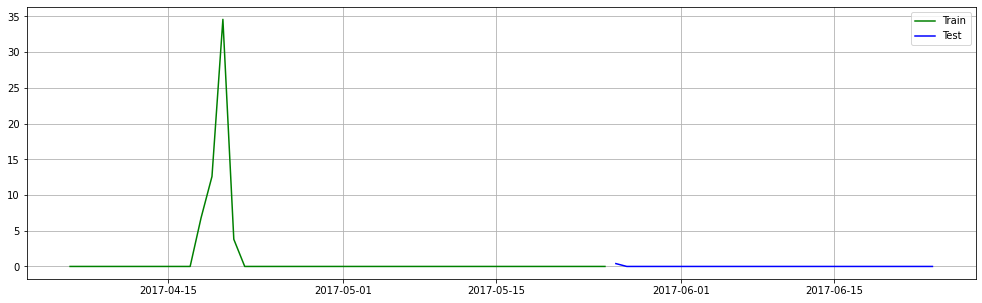

In [160]:
# Visualizing the trainig and testing datasets
plt.figure(figsize=(17, 5))
plt.grid(True)
plt.plot(train.index[-50:], train["Rainfall"][-50:], label="Train", color='green')
plt.plot(test.index, test["Rainfall"], label="Test", color="blue")
plt.legend()
plt.show()

In [161]:
# Checking For Stationarity using Argumented Dickey Fuller test
# If p < 0.05 ---> Data is stationary
# if p > 0.05 ---> Data is not stationary

def adf_test(dataset):
     dftest = adfuller(dataset, autolag = 'AIC')
     print("1. ADF : ",dftest[0])
     print("2. P-Value : ", dftest[1])
     print("3. Num Of Lags : ", dftest[2])
     print("4. Num Of Observations Used For ADF Regression:", dftest[3])
     print("5. Critical Values :")
     for key, val in dftest[4].items():
         print("\t",key, ": ", val)
        
adf_test(train['Rainfall'][:1000])

# Since, In the below result of the P-Value : 0.0. which is p < 0.05 ---> Data is stationary
# There is no need for differencing the values with previous values to make the timeseries stationary. 
# Time series is already stationary. 
# So,  from (p, d, q) value of d = 0 i.e (p, 0, q)

1. ADF :  -24.67984040402245
2. P-Value :  0.0
3. Num Of Lags :  0
4. Num Of Observations Used For ADF Regression: 999
5. Critical Values :
	 1% :  -3.4369127451400474
	 5% :  -2.864437475834273
	 10% :  -2.568312754566378


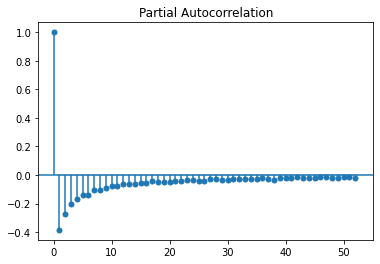

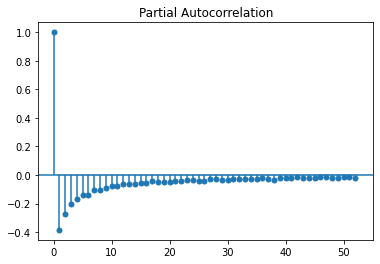

In [162]:
# Plotting Partial Auto-Corelation and Auto-corelation plot

# From the below plot I can consider the value of the p (PACF) to be maximum 5 or less than 5. 
# Rest of the values are significant. so I don't consider
# (p <= 5, d = 0, q)

# plt.rcParams.update({'figure.figsize':(7, 4), 'figure.dpi': 120})
plot_pacf(train['Rainfall'].diff().dropna())

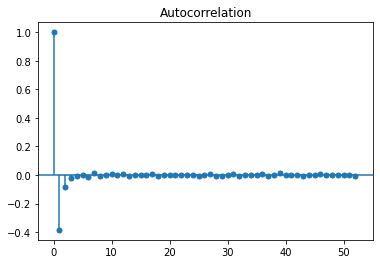

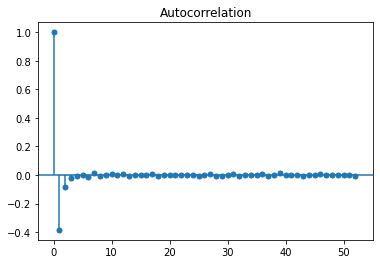

In [163]:
# q (acf) values can go to maximum 2 or less than 2 by below plot.  
# Rest of the values are significant so we don't consider
# # (p <= 5, d = 0, q <= 2)

plot_acf(train['Rainfall'].diff().dropna())

In [164]:
# I need to check which model fits best

# AIC, BIC and HQIC score needs to be low as possible
# P>|z| :- Represent significant level. It should be less.

# Training an Arima model with order of (Auto-Regressive, Integrated, Moving Average) as
# (p, d, q) --> (5, 0, 2)

order_1 = (5, 0, 2)

model_1 = ARIMA(train[['Rainfall']],order=order_1)
model_1 = model_1.fit()
model_1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               Rainfall   No. Observations:               142163
Model:                 ARIMA(5, 0, 2)   Log Likelihood             -496859.794
Date:                Wed, 28 Dec 2022   AIC                         993737.587
Time:                        19:32:25   BIC                         993826.370
Sample:                             0   HQIC                        993764.112
                             - 142163                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.3500      0.107     22.027      0.000       2.141       2.559
ar.L1          0.3010      0.033      9.168      0.000       0.237       0.365
ar.L2          0.9239      0.041     22.740      0.000       0.844       1.004
ar.L3         -0.2199      0.008    -28.076      0.000      -0.235      -0.205
ar.L4         -0.0185      0.001    -14.086      0.000      -0.021      -0.016
ar.L5         -0.0064      0.002     -4.024      0.000      -0.010      -0.003
ma.L1         -0.0312      0.033     -0.950      0.342      -0.095       0.033
ma.L2         -0.9007      0.032    -28.357      0.000      -0.963      -0.838
sigma2        63.5768      0.038   1657.365      0.000      63.502      63.652
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):         175536850.15
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               0.50   Skew:                             9.23
Prob(H) (two-sided):                  0.00   Kurtosis:                       174.15
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [165]:
# Checking How Good Your Model Is by predicting

start=len(train)
end=len(train)+len(test)-1
pred_1 = model_1.predict(start=start, end=end, typ='levels').rename('ARIMA Predictions')
pred_1

142163    0.957895
142164    1.221011
142165    1.299279
142166    1.355258
142167    1.368862
142168    1.396476
142169    1.401915
142170    1.424539
142171    1.429691
142172    1.450352
142173    1.456077
142174    1.475304
142175    1.481596
142176    1.499581
142177    1.506341
142178    1.523217
142179    1.530347
142180    1.546225
142181    1.553641
142182    1.568621
142183    1.576248
142184    1.590415
142185    1.598193
142186    1.611621
142187    1.619496
142188    1.632252
142189    1.640180
142190    1.652322
142191    1.660265
142192    1.671844
Name: ARIMA Predictions, dtype: float64

<AxesSubplot:xlabel='Date'>

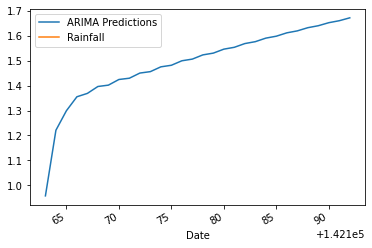

In [166]:
pred_1.plot(legend=True)
test["Rainfall"][500:].plot(legend=True)

In [167]:
# Adding the date values from df index
pred_1.index = df.index[start : end + 1]
pred_1

Date
2017-05-26    0.957895
2017-05-27    1.221011
2017-05-28    1.299279
2017-05-29    1.355258
2017-05-30    1.368862
2017-05-31    1.396476
2017-06-01    1.401915
2017-06-02    1.424539
2017-06-03    1.429691
2017-06-04    1.450352
2017-06-05    1.456077
2017-06-06    1.475304
2017-06-07    1.481596
2017-06-08    1.499581
2017-06-09    1.506341
2017-06-10    1.523217
2017-06-11    1.530347
2017-06-12    1.546225
2017-06-13    1.553641
2017-06-14    1.568621
2017-06-15    1.576248
2017-06-16    1.590415
2017-06-17    1.598193
2017-06-18    1.611621
2017-06-19    1.619496
2017-06-20    1.632252
2017-06-21    1.640180
2017-06-22    1.652322
2017-06-23    1.660265
2017-06-24    1.671844
Name: ARIMA Predictions, dtype: float64

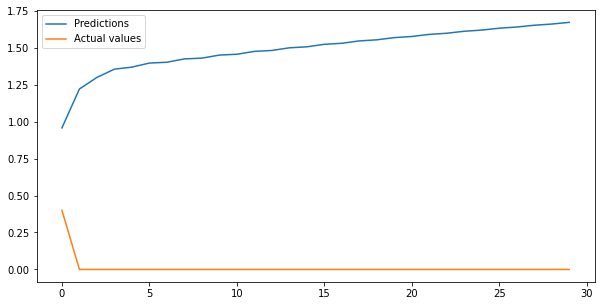

In [168]:
plt.figure(figsize=(10, 5))
plt.plot(pred_1.values, label="Predictions")
plt.plot(test["Rainfall"].values, label="Actual values")
plt.legend(loc='best')

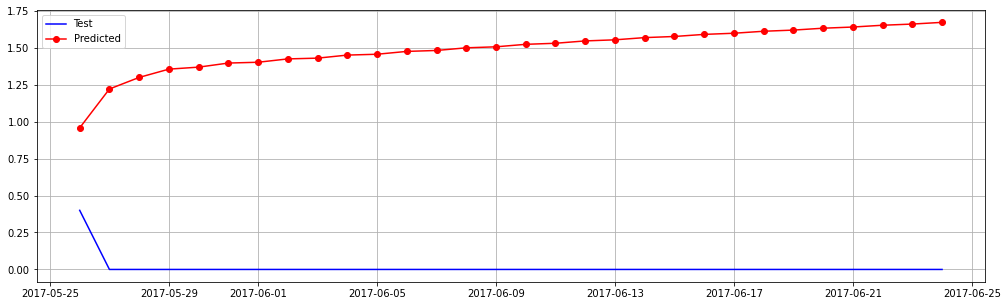

In [169]:
# Visualizing the testing and predicted values for test dataset
plt.figure(figsize=(17, 5))
plt.grid(True)
plt.plot(test.index, test["Rainfall"], label="Test", color="blue")
plt.plot(pred_1.index, pred_1.values, label="Predicted", color="red", marker='o')
plt.legend()
plt.show()

In [170]:
test['Rainfall'].mean()
rmse=sqrt(mean_squared_error(pred_1, test['Rainfall']))
print(f"Root mean square error: {rmse}")
mae = mean_absolute_error(pred_1, test['Rainfall'])
print(f"Mean Absolute Error: {mae}")

Root mean square error: 1.4905759675572268
Mean Absolute Error: 1.4766355548156271


### Creating model and testing - 2

## 4 - Model Development - Building the model with the right selection of the parameters

In [171]:
# Spliting the data into test and train.

print(df.shape)
train=df.iloc[:-30]
test=df.iloc[-30:]
print(train.shape,test.shape)

(142193, 23)
(142163, 23) (30, 23)


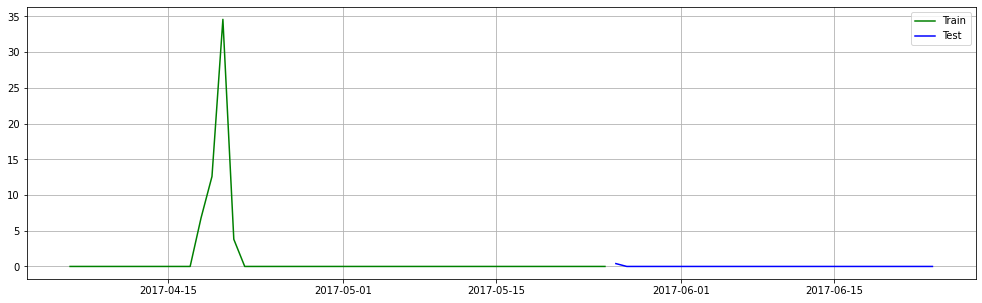

In [172]:
# Visualizing the trainig and testing datasets

plt.figure(figsize=(17, 5))
plt.grid(True)
plt.plot(train.index[-50:], train["Rainfall"][-50:], label="Train", color='green')
plt.plot(test.index, test["Rainfall"], label="Test", color="blue")
plt.legend()
plt.show()

In [173]:
# Creating the ARIMA model for order (2, 1, 4) and testing other orders

model_2 = ARIMA(train['Rainfall'], order=(2,1,4)) # (3, 1, 5) # (6, 1, 5)
model_2 = model_2.fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               Rainfall   No. Observations:               142163
Model:                 ARIMA(2, 1, 4)   Log Likelihood             -497156.936
Date:                Wed, 28 Dec 2022   AIC                         994327.873
Time:                        19:33:40   BIC                         994396.926
Sample:                             0   HQIC                        994348.503
                             - 142163                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4340      0.026    -16.597      0.000      -0.485      -0.383
ar.L2          0.5122      0.019     27.576      0.000       0.476       0.549
ma.L1         -0.2920      0.026    -11.154      0.000      -0.343      -0.241
ma.L2         -0.9925      0.033    -30.144      0.000      -1.057      -0.928
ma.L3          0.2614      0.012     21.426      0.000       0.237       0.285
ma.L4          0.0443      0.004     11.820      0.000       0.037       0.052
sigma2        63.8374      0.030   2105.982      0.000      63.778      63.897
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):         167520103.73
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               0.51   Skew:                             9.02
Prob(H) (two-sided):                  0.00   Kurtosis:                       170.20
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## 5 - Model Tuning - Improving the model performance by tuning the hyper parameters

In [174]:
# enforce_stationarity : bool, optional
#         Whether or not to require the autoregressive parameters to correspond
#         to a stationarity process.
        
# enforce_invertibility : bool, optional
#         Whether or not to require the moving average parameters to correspond
#         to an invertible process.
        
# concentrate_scale : bool, optional
#         Whether or not to concentrate the scale (variance of the error term)
#         out of the likelihood. This reduces the number of parameters by one.
#         This is only applicable when considering estimation by numerical
#         maximum likelihood.

# missing : str
#         Available options are 'none', 'drop', and 'raise'. If 'none', no nan
#         checking is done. If 'drop', any observations with nans are dropped.
#         If 'raise', an error is raised. Default is 'none'.
        
model_2 = ARIMA(train['Rainfall'], order=(2,1,4), enforce_stationarity = True, enforce_invertibility=True, concentrate_scale=True, missing='raise') # (3, 1, 5) # (4, 2, 3)
model_2 = model_2.fit()
model_2.summary()

# After hyperparameter tuning the ARIMA model performance slightly increased.

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               Rainfall   No. Observations:               142163
Model:                 ARIMA(2, 1, 4)   Log Likelihood             -497157.105
Date:                Wed, 28 Dec 2022   AIC                         994328.210
Time:                        19:34:43   BIC                         994397.263
Sample:                             0   HQIC                        994348.840
                             - 142163   Scale                           63.837
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4389      0.024    -18.432      0.000      -0.486      -0.392
ar.L2          0.5161      0.017     30.222      0.000       0.483       0.550
ma.L1         -0.2871      0.024    -12.043      0.000      -0.334      -0.240
ma.L2         -0.9999      0.029    -34.139      0.000      -1.057      -0.943
ma.L3          0.2633      0.012     22.536      0.000       0.240       0.286
ma.L4          0.0450      0.004     12.518      0.000       0.038       0.052
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):         167511921.21
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               0.51   Skew:                             9.02
Prob(H) (two-sided):                  0.00   Kurtosis:                       170.19
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## 6 - Model Evaluation - Testing the model on sufficient sample for correctness

<AxesSubplot:xlabel='Date'>

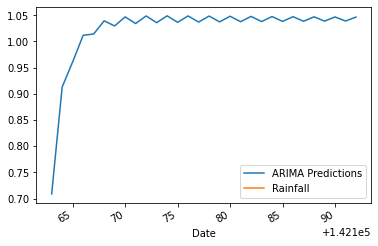

In [175]:
# Check How Good Your Model Is by predicting
start=len(train)
end=len(train)+len(test)-1
pred_2 = model_2.predict(start=start,end=end,typ='levels').rename('ARIMA Predictions')
pred_2[-50:].plot(legend=True)
test['Rainfall'][50:].plot(legend=True)

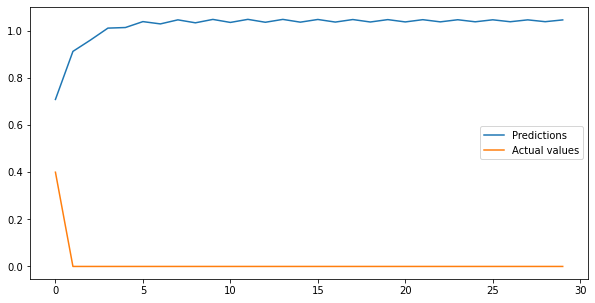

In [176]:
plt.figure(figsize=(10, 5))
plt.plot(pred_2.values, label="Predictions")
plt.plot(test["Rainfall"].values, label="Actual values")
plt.legend(loc='best')

In [177]:
# Check your Accuracy Metric

test['Rainfall'].mean()
rmse=sqrt(mean_squared_error(pred_2, test['Rainfall']))
print(f"Root mean square error: {rmse}")
mae = mean_absolute_error(pred_2, test['Rainfall'])
print(f"Mean Absolute Error: {mae}")

Root mean square error: 1.0174400491369107
Mean Absolute Error: 1.0087237699400742


In [178]:
df.tail() # Checking at what date my dataset ends

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
Date,,,,,,,,,,,,,,,,,,,,,
2017-06-20,41,3.5,21.8,0.0,5.469824,7.624853,0,31.0,2,0,...,27.0,1024.7,1021.2,4.437189,4.503167,9.4,20.9,0,0.0,0
2017-06-21,41,2.8,23.4,0.0,5.469824,7.624853,0,31.0,9,1,...,24.0,1024.6,1020.3,4.437189,4.503167,10.1,22.4,0,0.0,0
2017-06-22,41,3.6,25.3,0.0,5.469824,7.624853,6,22.0,9,3,...,21.0,1023.5,1019.1,4.437189,4.503167,10.9,24.5,0,0.0,0
2017-06-23,41,5.4,26.9,0.0,5.469824,7.624853,3,37.0,9,14,...,24.0,1021.0,1016.8,4.437189,4.503167,12.5,26.1,0,0.0,0
2017-06-24,41,7.8,27.0,0.0,5.469824,7.624853,9,28.0,10,3,...,24.0,1019.4,1016.5,3.000000,2.000000,15.1,26.0,0,0.0,0


In [179]:
# Making prediction for the next 1 day

index_future_dates = pd.date_range(start='2017-06-24', end='2017-06-25')
pred_2 = model_2.predict(start=len(df), end=len(df)+1, typ='levels').rename("ARIMA Predictions")
pred_2.index = index_future_dates
pred_2

2017-06-24    1.039239
2017-06-25    1.046324
Freq: D, Name: ARIMA Predictions, dtype: float64

<AxesSubplot:>

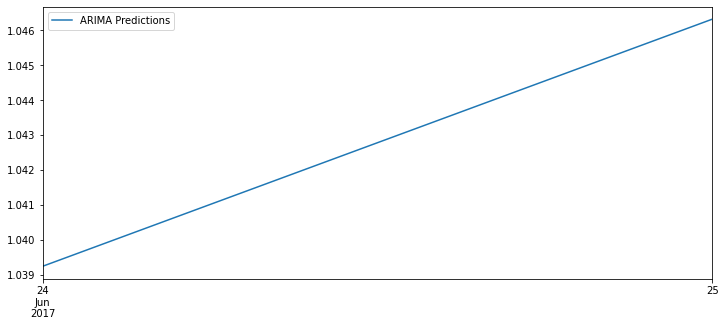

In [180]:
pred_2.plot(figsize=(12, 5), legend=True)

In [181]:
pred_2

2017-06-24    1.039239
2017-06-25    1.046324
Freq: D, Name: ARIMA Predictions, dtype: float64

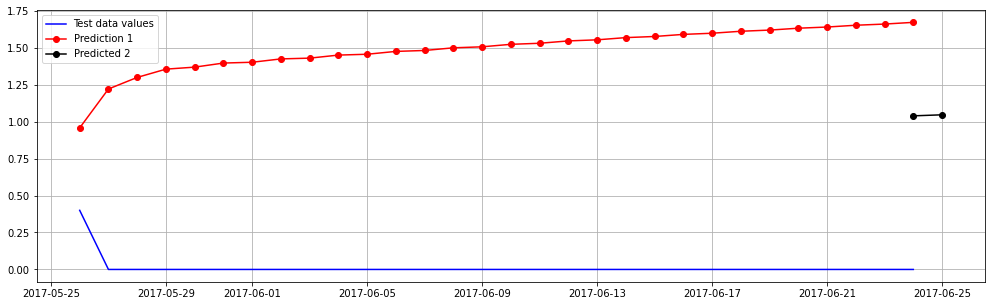

In [182]:
# Visualizing the testing and predicted values for test dataset
plt.figure(figsize=(17, 5))
plt.grid(True)
plt.plot(test.index, test["Rainfall"], label="Test data values", color="blue")
plt.plot(pred_1.index, pred_1.values, label="Prediction 1", marker='o', color='red')
plt.plot(pred_2.index, pred_2.values, label="Predicted 2", color="black", marker='o')
plt.legend()
plt.show()

### Now creating final model

In [183]:
# Now we are training the model on all the dataset and predicting the next day
# From previous ARIMA order (2, 1, 4) is giving less error and more effecient than other orders
# of ARIMA model. So, I used (2, 1, 4) for (p, d, q) which represent (Auto-regressive, Integreated, Moving Average)
# ARIMA models are generally denoted as ARIMA (p,d,q) 
# where p is the order of autoregressive model, 
# d is the degree of differencing, and q is the order of moving-average model.

model_3 = ARIMA(df['Rainfall'], order=(2, 1, 4)) # (2,1,4) # (3, 1, 5) # (5, 0, 2)
model_3 = model_3.fit()
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               Rainfall   No. Observations:               142193
Model:                 ARIMA(2, 1, 4)   Log Likelihood             -497246.927
Date:                Wed, 28 Dec 2022   AIC                         994507.853
Time:                        19:35:58   BIC                         994576.908
Sample:                             0   HQIC                        994528.483
                             - 142193                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4342      0.026    -16.591      0.000      -0.486      -0.383
ar.L2          0.5120      0.019     27.553      0.000       0.476       0.548
ma.L1         -0.2918      0.026    -11.140      0.000      -0.343      -0.240
ma.L2         -0.9924      0.033    -30.119      0.000      -1.057      -0.928
ma.L3          0.2612      0.012     21.405      0.000       0.237       0.285
ma.L4          0.0443      0.004     11.806      0.000       0.037       0.052
sigma2        63.8237      0.030   2106.427      0.000      63.764      63.883
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):         167625989.35
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               0.51   Skew:                             9.02
Prob(H) (two-sided):                  0.00   Kurtosis:                       170.23
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [184]:
df.tail() # Checking at what date my dataset ends

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
Date,,,,,,,,,,,,,,,,,,,,,
2017-06-20,41,3.5,21.8,0.0,5.469824,7.624853,0,31.0,2,0,...,27.0,1024.7,1021.2,4.437189,4.503167,9.4,20.9,0,0.0,0
2017-06-21,41,2.8,23.4,0.0,5.469824,7.624853,0,31.0,9,1,...,24.0,1024.6,1020.3,4.437189,4.503167,10.1,22.4,0,0.0,0
2017-06-22,41,3.6,25.3,0.0,5.469824,7.624853,6,22.0,9,3,...,21.0,1023.5,1019.1,4.437189,4.503167,10.9,24.5,0,0.0,0
2017-06-23,41,5.4,26.9,0.0,5.469824,7.624853,3,37.0,9,14,...,24.0,1021.0,1016.8,4.437189,4.503167,12.5,26.1,0,0.0,0
2017-06-24,41,7.8,27.0,0.0,5.469824,7.624853,9,28.0,10,3,...,24.0,1019.4,1016.5,3.000000,2.000000,15.1,26.0,0,0.0,0


In [185]:
# Making prediction for the next 1 day
index_future_dates = pd.date_range(start='2017-06-24', end='2017-06-25')
pred_3 = model_3.predict(start=len(df), end=len(df)+1, typ='levels').rename("ARIMA Predictions")
pred_3.index = index_future_dates
pred_3

2017-06-24    0.443889
2017-06-25    0.566208
Freq: D, Name: ARIMA Predictions, dtype: float64

<AxesSubplot:>

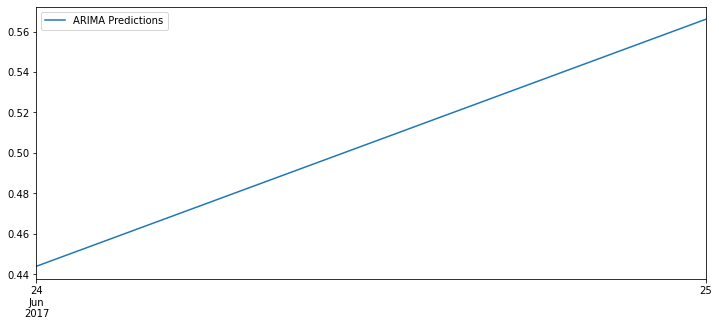

In [186]:
pred_3.plot(figsize=(12, 5), legend=True)

In [187]:
pred_3

2017-06-24    0.443889
2017-06-25    0.566208
Freq: D, Name: ARIMA Predictions, dtype: float64

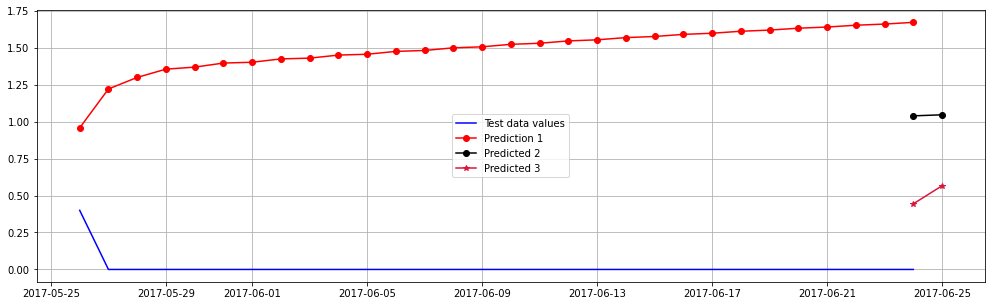

In [188]:
# Visualizing the testing and predicted values for test dataset
plt.figure(figsize=(17, 5))
plt.grid(True)
plt.plot(test.index, test["Rainfall"], label="Test data values", color="blue")
plt.plot(pred_1.index, pred_1.values, label="Prediction 1", marker='o', color='red')
plt.plot(pred_2.index, pred_2.values, label="Predicted 2", color="black", marker='o')
plt.plot(pred_3.index, pred_3.values, label="Predicted 3", color="crimson", marker='*')
plt.legend()
plt.show()

# Logistic Regression

In [189]:
# Using the Logistic Regression model to predict the forecast given by ARIMA model for 
# rainfall and predicting if the next day 2017-06-25 will rain or not.
# If the logistic regression model predicts 
# 1 then "Will likely to rain on next day"
# 0 Then "Will not likely to rain on next day"

In [190]:
os.getcwd()

'/home/user780/user780/AI_Assignment_2'

In [191]:
# Reading the csv file again and for preparing the whether the rain will fall on next day or not.
df = pd.read_csv('/home/user780/user780/AI_Assignment_2/weatherAUS.csv')
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


In [192]:
# Droping the date column as it is not needed only Rainfall columns is needed.
df.drop(columns="Date", inplace=True)

In [193]:
df.dtypes

Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RISK_MM          float64
RainTomorrow      object
dtype: object

In [194]:
df["Rainfall"].isna().sum() # Checking for null values of Rainfall

1406

In [195]:
# Both the method Interpolate and mean for filling the null values of the rainfall 
# is giving same accuracy score. So, I have used mean.

# df["Rainfall"].interpolate(method ='linear', limit_direction='both', inplace=True)
df["Rainfall"].fillna(df["Rainfall"].mean(), inplace=True)
df["Rainfall"].isna().sum()

0

In [196]:
# Replacing the 'yes' with 1 and 'No' with 0

df['RainTomorrow'] = df['RainTomorrow'].apply(lambda x : 1 if x == 'Yes' else 0)

In [197]:
set(df["RainTomorrow"]) # unique values for RainTomarrow

{0, 1}

In [198]:
# Creating Train and test data.

X = df[["Rainfall"]]
y = df[["RainTomorrow"]]

In [199]:
# pre-processing the values of independent variable by using MinMaxScaling
# rescaling the range of features to scale the range in [0, 1] or [-1, 1]

scaler = MinMaxScaler()
norm_X = scaler.fit_transform(X)
X_norm = pd.DataFrame(norm_X, columns = X.columns) 

In [200]:
# Splitting the train and test data in X_train, X_test, y_train and y_test
# Where, 
# X_train and y_train will be for training.
# X_test and y_test will be for testing.

X_train, X_test, y_train, y_test = train_test_split(X_norm, y, random_state=104, test_size=0.25, shuffle=True)
print(f"X train: {X_train.shape}")
print(f"X test: {X_test.shape}")
print(f"y train: {y_train.shape}")
print(f"y test: {y_test.shape}")

X train: (106644, 1)
X test: (35549, 1)
y train: (106644, 1)
y test: (35549, 1)


In [201]:
# Using sklearn's LogisticRegression model and training it with train datasets.

log_model = LogisticRegression() 
log_model.fit(X_train, y_train)

LogisticRegression()

In [202]:
# Hyper-parameter tuning of logistic model and testing

# penalty : {'l1', 'l2', 'elasticnet', 'none'}, default='l2'
#         Specify the norm of the penalty:

#         - `'none'`: no penalty is added;
#         - `'l2'`: add a L2 penalty term and it is the default choice;
#         - `'l1'`: add a L1 penalty term;
#         - `'elasticnet'`: both L1 and L2 penalty terms are added.

# C : float, default=1.0
#         Inverse of regularization strength; must be a positive float.
#         Like in support vector machines, smaller values specify stronger
#         regularization.
        
# fit_intercept : bool, default=True
#         Specifies if a constant (a.k.a. bias or intercept) should be
#         added to the decision function.
        
# intercept_scaling : float, default=1
    
# class_weight : dict or 'balanced', default=None
#         Weights associated with classes in the form ``{class_label: weight}``.
#         If not given, all classes are supposed to have weight one.

#         The "balanced" mode uses the values of y to automatically adjust
#         weights inversely proportional to class frequencies in the input data
#         as ``n_samples / (n_classes * np.bincount(y))``.
        
# random_state : int, RandomState instance, default=None
#         Used when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle the
#         data. See :term:`Glossary <random_state>` for details.

# solver : {'newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'}, \
#             default='lbfgs'

log_model = LogisticRegression(penalty = 'l2', C=10, fit_intercept = True, intercept_scaling = 1, class_weight='balanced', random_state = 42, solver='saga') 
log_model.fit(X_train, y_train)

LogisticRegression(C=10, class_weight='balanced', random_state=42,
                   solver='saga')

In [203]:
y_pred = log_model.predict(X_test) # Predicting on test dataset
y_pred

array([0, 0, 1, ..., 0, 0, 0])

In [204]:
# Evaluating the model accuracy of Logistic Regression model

# Accuracy = r2_score(y_test['No'], y_pred) * 100
Accuracy = accuracy_score(y_test, y_pred) * 100

print(f"Accuracy is: {Accuracy}")

Accuracy is: 78.18504036681763


In [205]:
pred_1 # Gives the predictions of Rainfall for test data set which have last 30 row for model 1.

Date
2017-05-26    0.957895
2017-05-27    1.221011
2017-05-28    1.299279
2017-05-29    1.355258
2017-05-30    1.368862
2017-05-31    1.396476
2017-06-01    1.401915
2017-06-02    1.424539
2017-06-03    1.429691
2017-06-04    1.450352
2017-06-05    1.456077
2017-06-06    1.475304
2017-06-07    1.481596
2017-06-08    1.499581
2017-06-09    1.506341
2017-06-10    1.523217
2017-06-11    1.530347
2017-06-12    1.546225
2017-06-13    1.553641
2017-06-14    1.568621
2017-06-15    1.576248
2017-06-16    1.590415
2017-06-17    1.598193
2017-06-18    1.611621
2017-06-19    1.619496
2017-06-20    1.632252
2017-06-21    1.640180
2017-06-22    1.652322
2017-06-23    1.660265
2017-06-24    1.671844
Name: ARIMA Predictions, dtype: float64

In [206]:
pred_2 # Gives the predictions of Rainfall for model 2 for current day and next day which is 2017-06-25.

2017-06-24    1.039239
2017-06-25    1.046324
Freq: D, Name: ARIMA Predictions, dtype: float64

In [207]:
pred_2.iloc[1] # Rainfall float value for the next day according to model_2 prediction.

1.0463243469027794

In [208]:
log_model.predict([[pred_2.iloc[1]]]) # It is going to be rain on next day 2017-06-25.

array([1])

In [209]:
pred_3 # Final model

2017-06-24    0.443889
2017-06-25    0.566208
Freq: D, Name: ARIMA Predictions, dtype: float64

In [210]:
pred_3.iloc[1] # Rainfall float value for the next day according to model_3 (Final model) prediction.

0.5662079817703275

In [211]:
# It is going to rain or not
# if 1 :- Will rain on next day 2017-06-25.
# else:- Will not rain on next day 2017-06-25.
prediction = int(log_model.predict([[pred_3.iloc[1]]])) 
if prediction == 1:
    print("Will rain on next day 2017-06-25.")
else:
    print("Will not rain on next day 2017-06-25.")


Will rain on next day 2017-06-25.


# Conclusion:-

## It is likely to be rain on the next day 2017-06-25.